<a href="https://colab.research.google.com/github/Jainish5658/Physics-Informed-Nueral-Networks/blob/main/damped_harmonic_osciallator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install deepxde

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.2/184.2 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 5.1 MB/s eta 0:00:00


In [37]:
import deepxde as dde
import numpy as np
import tensorflow as tf

# Define the simple harmonic oscillator equation
def sho_eq(x, u):
    du_x = dde.grad.jacobian(u, x, i=0, j=0)
    d2u_xx = dde.grad.hessian(u, x, component=0)
    omega = 1.0  # Angular frequency, change as needed
    return d2u_xx + 2 * du_x + 10 * u       #need to check how to introduce force into this.... like if a forced oscillation

def boundary_l(x, on_boundary):
    return on_boundary and dde.utils.isclose(x[0],0)


def func(x):
  return (4 * np.exp(-x) * np.cos(3*x))


# Define the geometry and time domain
geom = dde.geometry.TimeDomain(0, 0.75)  # Time domain from 0 to 30
def error2(inputs,outputs,X):
    return dde.grad.jacobian(outputs, inputs, i=0, j=None) + 4

ic1 = dde.IC(geom, lambda x: 4,lambda _, on_initial: on_initial)
ic2 = dde.icbc.OperatorBC(geom, error2,boundary_l)
#ic2 = dde.IC(geom, lambda x: 0, lambda _, on_initial: on_initial)  # Set initial velocity to 0

# Define the PDE problem
data = dde.data.TimePDE(geom, sho_eq, [ic1, ic2], 16, 2, solution = func, num_test = 500)

# Define the neural network
net = dde.maps.FNN([1] + [128] * 3 + [1], "tanh", "Glorot uniform")

# Define the model
model = dde.Model(data, net)

# Compile and train the model
model.compile("adam", lr=1e-5)
losshistory, train_state = model.train(epochs=15000)




Compiling model...
Building feed-forward neural network...
'build' took 0.094476 s

'compile' took 1.692616 s

Training model...

Step      Train loss                        Test loss                         Test metric
0         [1.31e-01, 1.60e+01, 1.55e+01]    [1.36e-01, 1.60e+01, 1.55e+01]    []  
1000      [3.28e+00, 1.14e+01, 6.39e+00]    [2.66e+00, 1.14e+01, 6.39e+00]    []  
2000      [8.95e-01, 6.83e+00, 1.29e-02]    [9.00e-01, 6.83e+00, 1.29e-02]    []  
3000      [1.09e+00, 3.21e+00, 1.19e-01]    [8.27e-01, 3.21e+00, 1.19e-01]    []  
4000      [1.34e+00, 2.50e+00, 1.50e-01]    [9.76e-01, 2.50e+00, 1.50e-01]    []  
5000      [1.12e+00, 2.02e+00, 1.26e-01]    [8.14e-01, 2.02e+00, 1.26e-01]    []  
6000      [3.37e-01, 2.51e-01, 1.49e-02]    [2.27e-01, 2.51e-01, 1.49e-02]    []  
7000      [6.57e-02, 1.48e-02, 5.21e-04]    [3.94e-02, 1.48e-02, 5.21e-04]    []  
8000      [8.16e-03, 2.58e-04, 1.18e-05]    [5.31e-03, 2.58e-04, 1.18e-05]    []  
9000      [4.28e-03, 5.40e-05, 2.

Saving loss history to /content/loss.dat ...
Saving training data to /content/train.dat ...
Saving test data to /content/test.dat ...


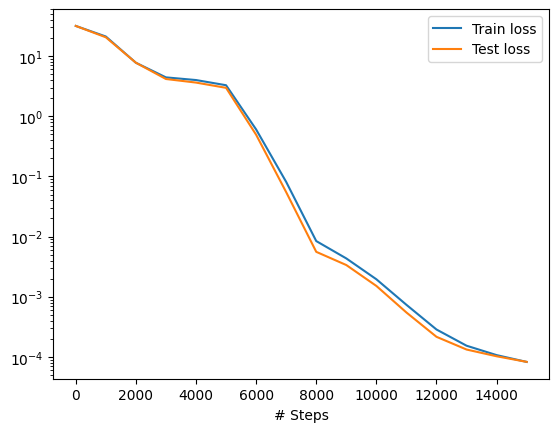

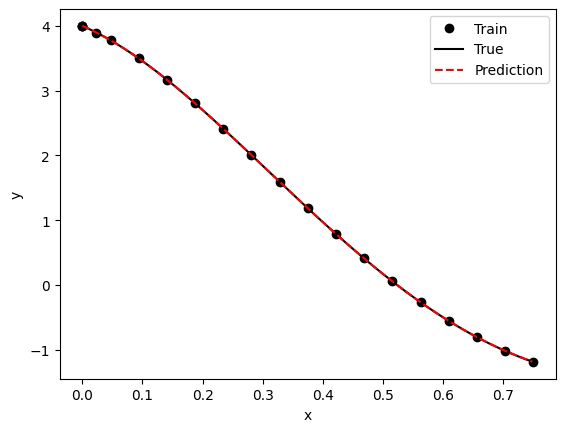

In [38]:
# Plot the results
dde.saveplot(losshistory, train_state, issave=True, isplot=True)

In [ ]:
import numpy as np

In [ ]:
def func(x):
  return np.exp(-x/20)*(np.cos((19.97/20)*x)+np.sin((19.97/20)*x))